<a href="https://colab.research.google.com/github/jeyanthan-gj/NLP-AND-LLM/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Word2Vec?

Word2Vec is a technique that converts words into numerical vectors in such a way
that words with similar meanings have similar vector representations.

It learns these representations by analyzing large amounts of text and observing
which words appear together in similar contexts.

As a result, Word2Vec allows machines to work with the meaning of words
instead of treating them as independent symbols.


## 📦 Install & Import Libraries

In this cell, we install and import the required libraries:
- **gensim** → for Word2Vec and loading datasets
- **Word2Vec** → to train word embeddings
- **gensim.downloader** → to load built-in text datasets

This setup allows us to train Word2Vec without manually downloading data.


In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 70.7 MB/s eta 0:00:00


In [2]:
from gensim.models import Word2Vec
from gensim.downloader import load


## 📚 Load Dataset & View Original Text

Here we load the **text8 dataset**, which is a cleaned Wikipedia corpus.

- The dataset is already tokenized (list of words)
- We reconstruct a sentence by joining tokens
- This step is only for **human understanding**
- Word2Vec itself works only on tokens


In [3]:
dataset = load("text8")


[==================================================] 100.0% 31.6/31.6MB downloaded


In [4]:
chunk = next(iter(dataset))   # one chunk (list of words)

# convert first 30 words into a sentence
sentence = " ".join(chunk[:30])
sentence


'anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst'

## 🧠 Train Word2Vec Model

In this cell, we train the Word2Vec model on real-world text.

What happens here:
- The model slides a window over words
- Learns which words appear together
- Creates vector representations for each word

Key parameters:
- `vector_size=100` → size of word vectors
- `window=5` → context window
- `min_count=5` → ignore very rare words


In [6]:
model = Word2Vec(
    sentences=dataset,
    vector_size=100,
    window=5,
    min_count=5,
    workers=8
)


## 🔍 Test Learned Word Meaning

Now we test whether the model has learned **semantic relationships**.

We check:
- Words similar to **car**
- Words similar to **king**
- Similarity score between **car** and **automobile**

High similarity indicates the model has learned meaning from context.


In [7]:
model.wv.most_similar("car")


[('driver', 0.7717748880386353),
 ('motorcycle', 0.7253185510635376),
 ('truck', 0.7093003988265991),
 ('cars', 0.7065984010696411),
 ('taxi', 0.6839169859886169),
 ('vehicle', 0.6701706051826477),
 ('mustang', 0.6413843631744385),
 ('sidecar', 0.6273514032363892),
 ('racing', 0.6223946213722229),
 ('pistol', 0.6103194355964661)]

### How Similarity is Measured
Word2Vec uses **cosine similarity** to measure how close two word vectors are.
- Value ranges from **-1 to 1**
- Higher value → more semantically similar


In [8]:
model.wv.most_similar("king")


[('queen', 0.7362047433853149),
 ('prince', 0.7329644560813904),
 ('emperor', 0.7281378507614136),
 ('throne', 0.7150638699531555),
 ('kings', 0.6828451156616211),
 ('elector', 0.6773290634155273),
 ('regent', 0.6691761612892151),
 ('constantine', 0.661899983882904),
 ('pope', 0.6594196557998657),
 ('aragon', 0.6534906029701233)]

In [9]:
model.wv.similarity("car", "automobile")


np.float32(0.6092583)

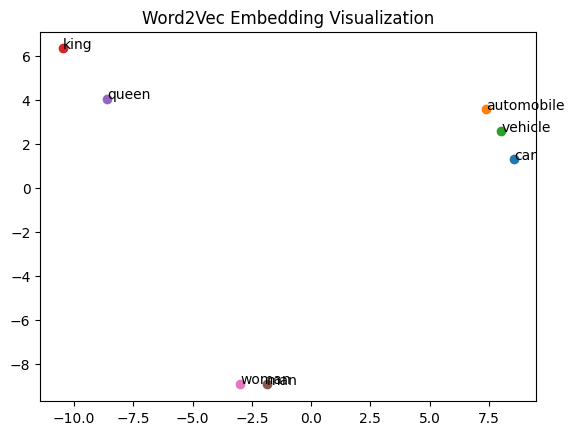

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["car", "automobile", "vehicle", "king", "queen", "man", "woman"]
vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure()
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0] + 0.01, reduced[i, 1] + 0.01, word)

plt.title("Word2Vec Embedding Visualization")
plt.show()


## ✅ Pros and ❌ Cons of Word2Vec

### ✅ Pros
- Captures **semantic meaning** of words based on context  
- Words with similar meanings have **similar vector representations**  
- More powerful than count-based methods like BoW and TF-IDF  
- Efficient and scalable for large text datasets  
- Widely used and well-supported in NLP applications  

### ❌ Cons
- Each word has **only one vector**, regardless of context  
  (e.g., "bank" for money and river have the same representation)
- Requires **large amounts of text** to learn good embeddings  
- Cannot handle **out-of-vocabulary (unseen) words** after training  
- Does not understand full sentence meaning or grammar  

